In [1]:
import pandas as pd

## Bisiklet Veri Setimizi Okuyalim

In [4]:
df = pd.read_excel('bisiklet_fiyatlari.xlsx')

In [5]:
df

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [7]:
import matplotlib.pyplot as plt
import seaborn as sbn

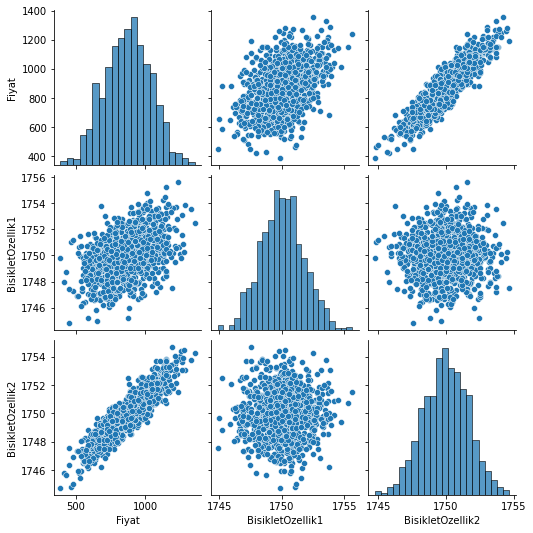

In [12]:
sbn.pairplot(df)

## Training ve Test veri setlerimizi bolelim;

In [14]:
from sklearn.model_selection import train_test_split # ML kutuphanelerinden biri olan sklearn ayirma isleminde kullanacagiz

### train_test_split; girdi olarak *args veya **kwargs alir.
### Veri setimizin features'leirini array'e donusturup vermemiz gerekli.
### X ve y o.u. 2 parametre vermemiz gerekli.
#### X -> feature(veri setimizin ozellikleri; araba yakiti, araba yili, araba rengi, araba km'si etc.)
#### y -> label(veri setimizden cikarmak istedigimiz sonuc; araba fiyati etc.)

### Ornek Kullanim;
## X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
#### X_train -> x'in train icin kullanilacak kismi
#### X_test -> x'in test icin kullanilacak kismi
#### y_train -> y'nin train icin kullanilacak kismi
#### y_test -> y'nin test icin kullanilacak kismi
#### X -> features
#### y -> output
#### test_size -> modelimizi test etmek icin % kacini ayirmamiz gerektigini ayarliyoruz. Genelde %33(0,33)'dur
#### random_state -> girilen deger 2 farkli uygulamada da ayni girilirse, uygulamalarda secilen veriler ayni olur.

## y = a*X+b
### y -> Output(ulasmak istedigimiz sonuc)
### a -> weight(hata oranini azaltmak icin kullandigimiz deger)
### X -> features(veri setimizin ozellikleri)
### b -> bias(gercek degerle hesaplanan deger arasindaki uzaklik / Hata)

In [15]:
df

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


y -> Fiyat  
X -> BisikletOzellik1, BisikletOzellik2

### y verilerini array'e cevirip degiskene atayalim;

In [24]:
y = df['Fiyat'].values # values demezsek Series olur biz burda numpy Array olusturduk

In [18]:
# y -> Label
y

array([ 807.6738764,  959.2275201,  718.0200329,  945.6688847,
        955.5429676,  950.2214253,  972.0999123,  730.7470179,
        653.0064296, 1108.363012 , 1092.432411 ,  831.9017301,
       1050.644778 ,  932.4576656,  827.4618849,  886.0465092,
        889.7252105, 1068.296866 ,  566.4010835,  780.8715318,
        633.7147302,  758.4686205,  983.5045088, 1115.291836 ,
        914.9140132,  822.1549425,  950.4423736,  989.5097974,
        927.5574942, 1068.515289 ,  844.4737208,  573.2300709,
       1014.528968 ,  784.7521757, 1100.709911 ,  939.3954013,
        997.617767 ,  626.1947566, 1071.148623 ,  778.1894898,
       1050.207614 ,  916.1829736,  897.6624037, 1076.042305 ,
        707.6178069, 1126.454907 ,  855.674057 ,  775.6082   ,
        900.3383662,  901.043046 ,  568.8524138,  970.6586024,
        789.93495  , 1028.438035 ,  836.0406201, 1005.402312 ,
        960.5938984,  925.2090462,  775.6192584,  696.2936631,
        622.6418664,  806.2158674,  935.842904 ,  940.8

In [25]:
type(y)

numpy.ndarray

In [20]:
X = df[['BisikletOzellik1', 'BisikletOzellik2']].values

In [22]:
# X -> Features
X

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       ...,
       [1752.540381, 1747.98331 ],
       [1751.34929 , 1747.484989],
       [1748.656426, 1752.539962]])

## Verilerimizi alttaki kod satiri sayesinde bolduk!

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [27]:
X_train.shape

(670, 2)

In [28]:
X_test.shape

(330, 2)

#### test_size=0.33 dedigimiz icin train=670, test=330 cikti
#### ayni sonuclar y icinde gecerlidir!